In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [6]:
def main_function(O2_rates, H2_rates, temp):
    
    for qo2,qh2 in zip(O2_rates, H2_rates):
        
        qh2 = qh2                                       #[*np.arange(35.0, 50.0 , 2)]
        qo2 = qo2                                       #[*np.arange(35.0, 50.0 , 2)]
        t   = temp
        I_L   = 0.14806      #input("Maximum Current density")           # Maximum current that can flow (10 A)
        I0    = 2.00         #input("Exchange Current")                  # Exchange Current (say 2 A)
        V_act = 0.1          #input("Activation Loss")                   # Activation Loss Not known(say 1)
        r     = 5.00         #input("Internal Resistance")               # Internal Resistance of SOFC(say 10 Ohm)
        Y = 0.200                                                       # Constant used in Ohmic Losses
        B = 2870.0                                                      # Constant used in Ohmic Losses
        T0 = 973.0                                                      # Constant in K
        E0 = 1.1                                                        # 1.1V Standerd Potential
        R = 8.31400                                                     # Univeral Gas Constant in (J/mol-K)
        F = 96486.0                                                     # Faradays Constant
        alpha1 = 0.1                                                    # Approximate 0.1
        alpha2 = 0.2                                                    # Approximate 0.1
        n = 2.0                                                         # No. o moles
        # Molar Valve constants for Hydrogen, Oxygen and Water
        Kh2 = 0.843
        Ko2 = 0.281
        Kh2o = 2.52
        # Response time for Hydrogen, Oxygen and Water
        Th2 = 26.10
        To2 = 2.91
        Th2o = 78.3
        Kr = 1.0/(8.0*F)


        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Fuel flow Rate in ml/sec for Oxygen - ")
        print(qh2)
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Fuel flow Rate in ml/sec for Hydrogen - ")
        print(qh2)
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        temp_list = pd.DataFrame({"Temperature":t})
        print(temp_list)
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
  
        # Current density over the temperature range
        I_fc_list =[]
        for T in t :
            first_term  =  np.exp((alpha1*n*F/(R*T))*V_act)
            second_term =  np.exp((-alpha2*n*F/(R*T))*V_act)
            I_fc =  I0*(first_term - second_term)
            I_fc_list.append(I_fc)

        I_fc = 1.1459
        curr_list = pd.DataFrame({"Output Current":I_fc_list})
        print(curr_list)

        # Partial pressures for Hydrogen, Oxygen and Water
        Ph2_list = []
        Po2_list = []
        Ph2o_list = []

        # Partial pressures for Hydrogen
        for I_fc in I_fc_list:
            item1 = ((1/Kh2)/(1+Th2))*(qh2 - 2*Kr*I_fc)
            Ph2_list.append(item1)

        # Partial pressures for Oxygen
        for I_fc in I_fc_list:
            item2 = ((1/Ko2)/(1+To2))*(qo2 - 2*Kr*I_fc) 
            Po2_list.append(item2)

        # Partial pressures for Water
        for I_fc in I_fc_list:
            x =  (1/Kh2o)
            y = (1+Th2o)
            z = (2*Kr*I_fc)
            item3 = (x)/(y)*(z) 
            Ph2o_list.append(item3)
    
    
    
    
        partial_pressure_vs_I_fc = pd.DataFrame({
                                          "I_fc Current":I_fc_list,
                                          "Ph2 - PP of Hydrogen" : Ph2_list,
                                           "Po2 - PP of Oxygen"  : Po2_list,
                                       })
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Partial Pressure for given Temperature range")
        print(partial_pressure_vs_I_fc," \n ")
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")




        # Nernst Potenstials for given Temprature range
        E_nernst = []

        for T,Ph2,Po2,Ph2o in zip(t,Ph2_list,Po2_list,Ph2o_list):
            item = (E0 + (R*T/(2*F))*(math.log((Ph2*math.pow(Po2,0.5))/Ph2o)))
            E_nernst.append(item)

        Temp_vs_Enernst = pd.DataFrame({
                                 "Temperature in K":t,
                                 "Nernst Voltage in V" : E_nernst,
                               })

        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Nernst Potentials for given Temperature range")
        print(Temp_vs_Enernst)
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        
        
        plt.figure(figsize=(7,4))
        plt.plot(t,E_nernst)
        plt.xlabel('Temp K')
        plt.ylabel('voltage (mV)')
        plt.grid(True)
        plt.show()
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")

        

        # Activation loss for given Temprature range
        V_act = []

        for T,I_fc in zip(t,I_fc_list):
            z = I_fc/(2.0*I0)
            item = ((R*T)/(2*alpha1*F))*(z+math.sqrt(1+math.pow(z,2)))
            V_act.append(item)
    
    
    
        Temp_vs_Vact = pd.DataFrame({
                            "Temperatures in K":t,
                            "Activation Losses in V" : V_act,
                          })
        
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Activation loss for given Temperature range")
        print(Temp_vs_Vact)
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")


        plt.figure(figsize=(7,4))
        plt.plot(t, V_act)
        plt.xlabel("Temperatures in K")
        plt.ylabel("Activation Losses in V")
        plt.grid(True)
        plt.show()
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")



        # Concentration Loss for temperature range
        V_conc = []
        for T,I_fc in zip(t,I_fc_list):
            item = (R*T/(n*F))*(math.log(1+(I_fc/I_L)))
            V_conc.append(item)
    
    
        Temp_vs_Vconc = pd.DataFrame({
                              "Temperature":t,
                              "Concentration Losses in V" : V_conc,
                            })

        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Concentration Loss for Temperature range")
        print(Temp_vs_Vconc)
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")

        plt.figure(figsize=(7,4))
        plt.plot(t,V_conc)
        plt.xlabel("Temperatures in K")
        plt.ylabel("Concentration Losses in V")

        plt.show()
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")



        # Ohmic Loss for given Temprature range
        V_ohmic = []
        for T,I_fc in zip(t,I_fc_list):
            item = (Y*(np.exp(B*((1/T0)-(1/T)))))*I_fc
            V_ohmic.append(item)
            
        Temp_vs_Vohm = pd.DataFrame({
                             "Temperature":t,
                             "Ohmic Losses in V" : V_ohmic,
                            })
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Ohmic Loss for given Temperature range")
        print(Temp_vs_Vohm)
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")

        plt.figure(figsize=(7,4))
        plt.plot(t,V_ohmic)
        plt.xlabel("Temperatures in K")
        plt.ylabel("Ohmic Losses in V")

        plt.show()
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")


        # Calculating net output voltage for given Temprature range
        a = np.add(V_ohmic, V_conc)
        b = np.add(a,V_act)
        V_out = np.subtract(E_nernst, b)

        Temp_vs_V_out = pd.DataFrame({
                             "Temperature":t,
                             "Output Voltage in V" : V_out,
                            })
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Output Voltage for given Temperature range")
        print(Temp_vs_V_out)
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")

        plt.figure(figsize=(7,4))
        plt.plot(t,V_out)
        plt.xlabel("Temperatures in K")
        plt.ylabel("Output Voltage in V")

        plt.show()
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")


        # Power for given Temperature range
        power = []
        for Ifc, Vout in zip(I_fc_list,V_out):
            power.append(Ifc*Vout)
    
        Temp_vs_power = pd.DataFrame({
                             "Temperature":t,
                             "Power" : power,
                            })
        
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Power for given Temperature range")
        print(Temp_vs_power)
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")

        plt.figure(figsize=(7,4))
        plt.plot(t,power)
        plt.xlabel("Temperatures in K")
        plt.ylabel("Power in W")

        plt.show()
        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")


        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Plotting all the voltage values for given Temperature range")
        plt.figure(figsize=(15,10))
        plt.plot(t,E_nernst, label="Nernst Potenstial")
        plt.plot(t, V_act, label="Avtivation Losses")
        plt.plot(t,V_conc, label="Concentration Losses")
        plt.plot(t,V_ohmic, label="Ohmic Losses")
        plt.plot(t,V_out, label="Output Voltage")

        plt.title("Plotting all the voltage values for given Temperature range")
        plt.xlabel("Temperatures in K")
        plt.ylabel("Voltage in V")
        plt.legend()
        plt.show()

        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Current v/s Voltage plot")
        plt.figure(figsize=(7,4))
        plt.plot(I_fc_list,V_out)

        plt.title("Current v/s Voltage plot")
        plt.xlabel('Current in A')
        plt.ylabel('Output Voltage in V')
        plt.show()


        print("-----------------------------------------------------------------------------------\n-----------------------------------------------------------------------------------")
        print("Output Result")
        data = pd.DataFrame({
            "Temperature (K)" :t,
            "Nernst Voltage(V)":E_nernst,
            "Activation Losses(V)":V_act,
            "Concentration Losses(V)":V_conc,
            "Ohmic Losses(V)":V_ohmic,
            "Current Density":I_fc_list,
            "Output Votage(V)":V_out,
            "Power (W)":power
        })

        print(data)
        print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Fuel flow Rate in ml/sec for Oxygen - 
25
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Fuel flow Rate in ml/sec for Hydrogen - 
25
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
   Temperature
0          523
1          573
2          623
3          673
4          723
5          773
6          823
7          873
8          923
9          973
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
   Output Current
0        2.293930
1        2.109221
2        1.953536
3    

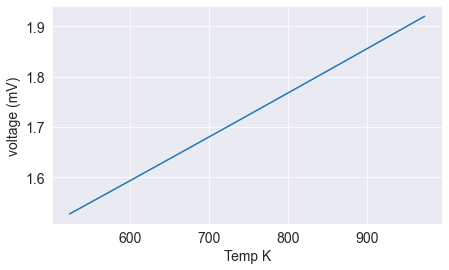

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Activation loss for given Temperature range
   Temperatures in K  Activation Losses in V
0                523                0.388975
1                573                0.409267
2                623                0.429802
3                673                0.450514
4                723                0.471356
5                773                0.492297
6                823                0.513317
7                873                0.534399
8                923                0.555532
9                973                0.576708
-----------------------------------------------------------------------------------
-----------------------------------------

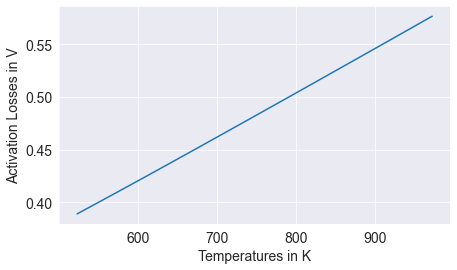

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Concentration Loss for Temperature range
   Temperature  Concentration Losses in V
0          523                   0.063159
1          573                   0.067255
2          623                   0.071206
3          673                   0.075021
4          723                   0.078709
5          773                   0.082280
6          823                   0.085741
7          873                   0.089098
8          923                   0.092358
9          973                   0.095526
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------

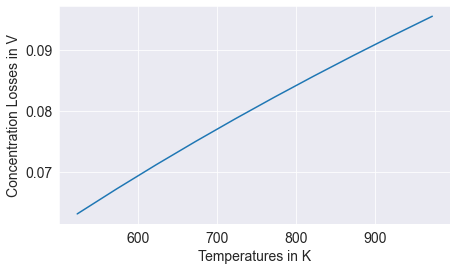

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Ohmic Loss for given Temperature range
   Temperature  Ohmic Losses in V
0          523           0.036258
1          573           0.053815
2          623           0.074504
3          673           0.097753
4          723           0.122948
5          773           0.149496
6          823           0.176858
7          873           0.204566
8          923           0.232228
9          973           0.259526
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


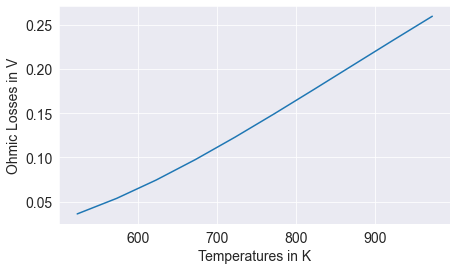

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Output Voltage for given Temperature range
   Temperature  Output Voltage in V
0          523             1.039355
1          573             1.040376
2          623             1.038333
3          673             1.033846
4          723             1.027555
5          773             1.020068
6          823             1.011930
7          873             1.003609
8          923             0.995498
9          973             0.987911
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


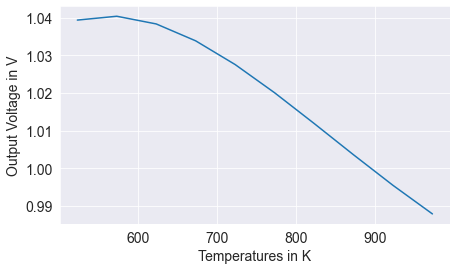

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Power for given Temperature range
   Temperature     Power
0          523  2.384206
1          573  2.194383
2          623  2.028420
3          673  1.881861
4          723  1.751654
5          773  1.635569
6          823  1.531872
7          873  1.439145
8          923  1.356185
9          973  1.281945
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


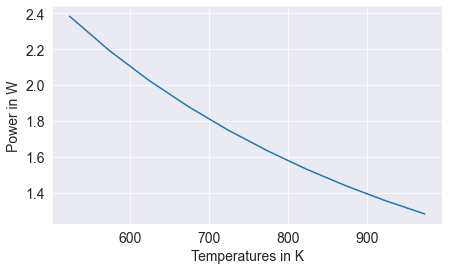

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Plotting all the voltage values for given Temperature range


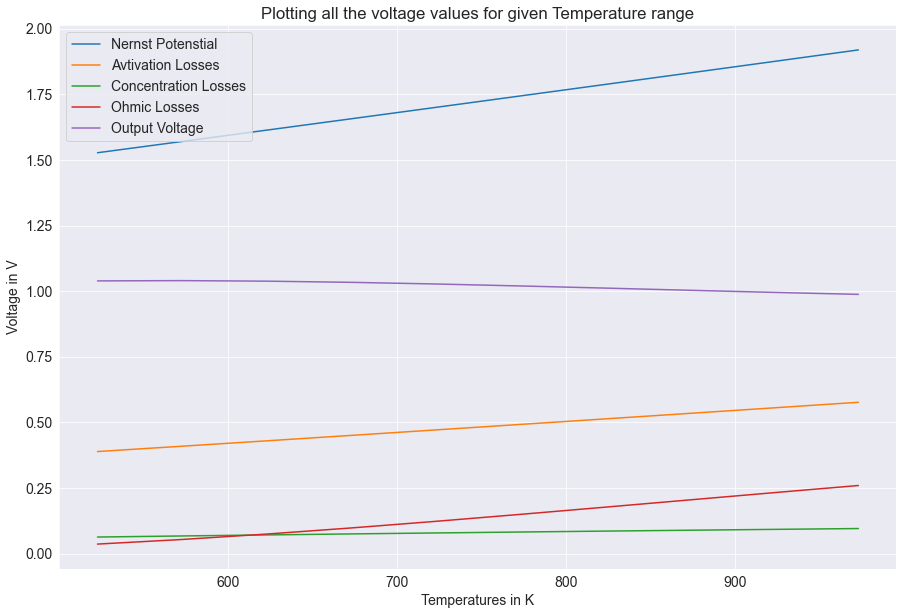

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Current v/s Voltage plot


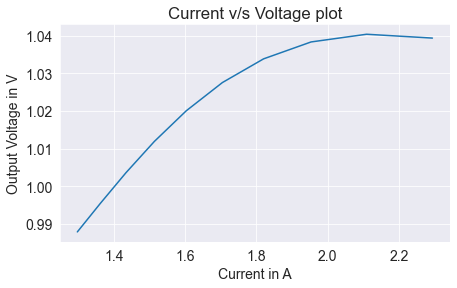

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Output Result
   Temperature (K)  Nernst Voltage(V)  Activation Losses(V)  \
0              523           1.527746              0.388975   
1              573           1.570712              0.409267   
2              623           1.613845              0.429802   
3              673           1.657133              0.450514   
4              723           1.700568              0.471356   
5              773           1.744142              0.492297   
6              823           1.787845              0.513317   
7              873           1.831672              0.534399   
8              923           1.875616              0.555532   
9              973           1.919671              0.576708   

   Concentration Losses(V)  Ohmic Losses(V)  Current Density  \
0                 0.063159         0.036258         2.293930

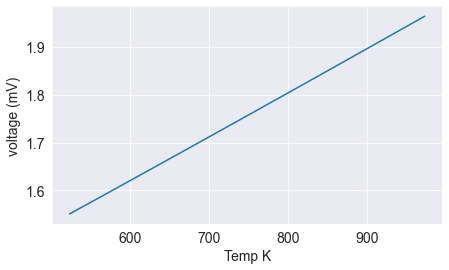

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Activation loss for given Temperature range
   Temperatures in K  Activation Losses in V
0                523                0.388975
1                573                0.409267
2                623                0.429802
3                673                0.450514
4                723                0.471356
5                773                0.492297
6                823                0.513317
7                873                0.534399
8                923                0.555532
9                973                0.576708
-----------------------------------------------------------------------------------
-----------------------------------------

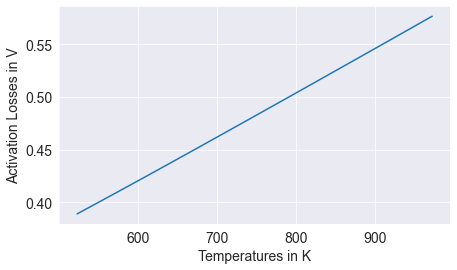

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Concentration Loss for Temperature range
   Temperature  Concentration Losses in V
0          523                   0.063159
1          573                   0.067255
2          623                   0.071206
3          673                   0.075021
4          723                   0.078709
5          773                   0.082280
6          823                   0.085741
7          873                   0.089098
8          923                   0.092358
9          973                   0.095526
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------

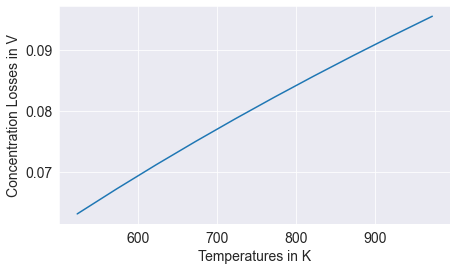

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Ohmic Loss for given Temperature range
   Temperature  Ohmic Losses in V
0          523           0.036258
1          573           0.053815
2          623           0.074504
3          673           0.097753
4          723           0.122948
5          773           0.149496
6          823           0.176858
7          873           0.204566
8          923           0.232228
9          973           0.259526
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


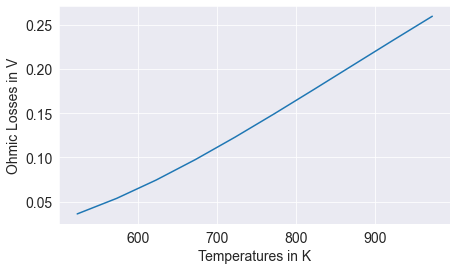

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Output Voltage for given Temperature range
   Temperature  Output Voltage in V
0          523             1.062783
1          573             1.066043
2          623             1.066240
3          673             1.063993
4          723             1.059942
5          773             1.054695
6          823             1.048796
7          873             1.042716
8          923             1.036844
9          973             1.031497
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


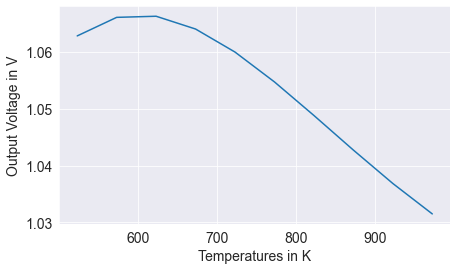

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Power for given Temperature range
   Temperature     Power
0          523  2.437948
1          573  2.248522
2          623  2.082939
3          673  1.936736
4          723  1.806863
5          773  1.691089
6          823  1.587681
7          873  1.495223
8          923  1.412511
9          973  1.338503
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


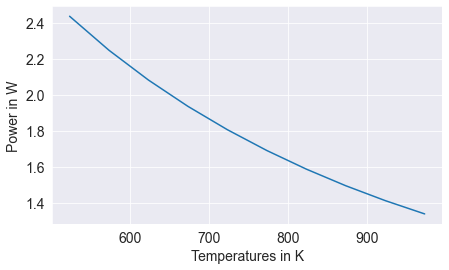

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Plotting all the voltage values for given Temperature range


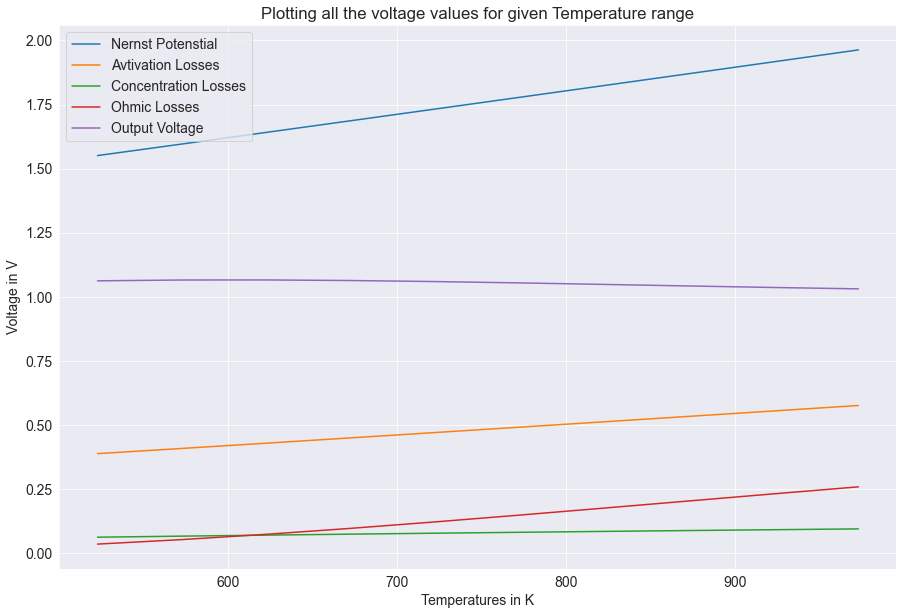

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Current v/s Voltage plot


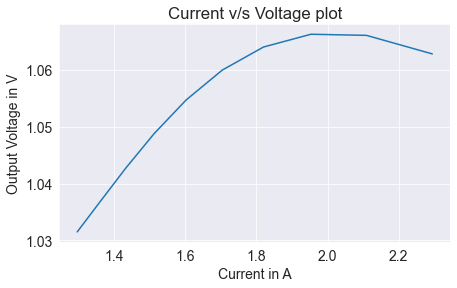

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Output Result
   Temperature (K)  Nernst Voltage(V)  Activation Losses(V)  \
0              523           1.551174              0.388975   
1              573           1.596380              0.409267   
2              623           1.641752              0.429802   
3              673           1.687281              0.450514   
4              723           1.732956              0.471356   
5              773           1.778768              0.492297   
6              823           1.824712              0.513317   
7              873           1.870778              0.534399   
8              923           1.916962              0.555532   
9              973           1.963257              0.576708   

   Concentration Losses(V)  Ohmic Losses(V)  Current Density  \
0                 0.063159         0.036258         2.293930

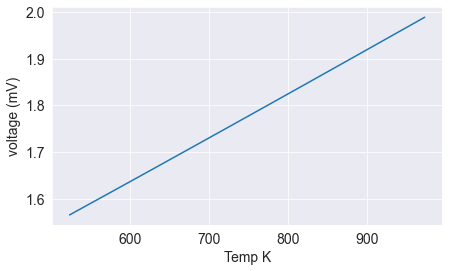

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Activation loss for given Temperature range
   Temperatures in K  Activation Losses in V
0                523                0.388975
1                573                0.409267
2                623                0.429802
3                673                0.450514
4                723                0.471356
5                773                0.492297
6                823                0.513317
7                873                0.534399
8                923                0.555532
9                973                0.576708
-----------------------------------------------------------------------------------
-----------------------------------------

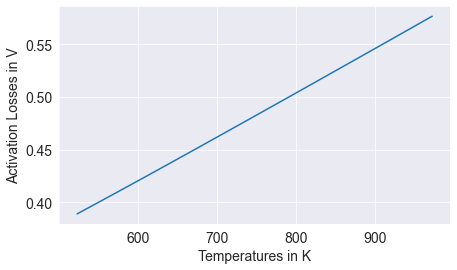

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Concentration Loss for Temperature range
   Temperature  Concentration Losses in V
0          523                   0.063159
1          573                   0.067255
2          623                   0.071206
3          673                   0.075021
4          723                   0.078709
5          773                   0.082280
6          823                   0.085741
7          873                   0.089098
8          923                   0.092358
9          973                   0.095526
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------

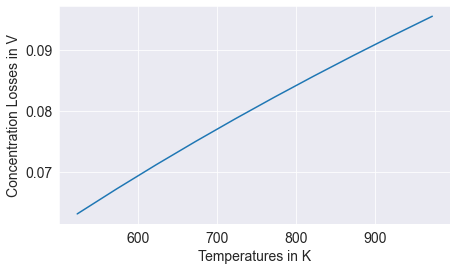

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Ohmic Loss for given Temperature range
   Temperature  Ohmic Losses in V
0          523           0.036258
1          573           0.053815
2          623           0.074504
3          673           0.097753
4          723           0.122948
5          773           0.149496
6          823           0.176858
7          873           0.204566
8          923           0.232228
9          973           0.259526
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


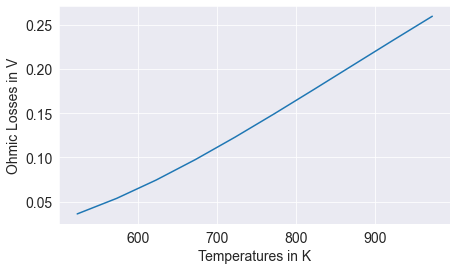

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Output Voltage for given Temperature range
   Temperature  Output Voltage in V
0          523             1.076487
1          573             1.081058
2          623             1.082565
3          673             1.081628
4          723             1.078888
5          773             1.074950
6          823             1.070362
7          873             1.065591
8          923             1.061030
9          973             1.056993
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


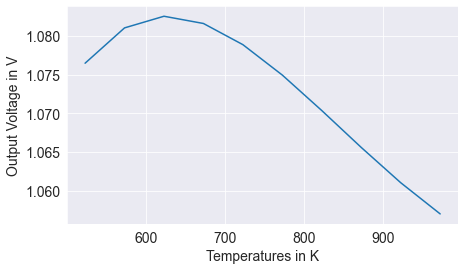

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Power for given Temperature range
   Temperature     Power
0          523  2.469385
1          573  2.280191
2          623  2.114830
3          673  1.968837
4          723  1.839159
5          773  1.723566
6          823  1.620328
7          873  1.528026
8          923  1.445460
9          973  1.371588
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------


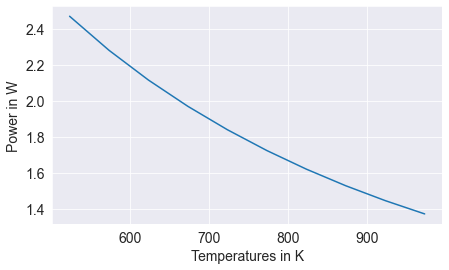

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Plotting all the voltage values for given Temperature range


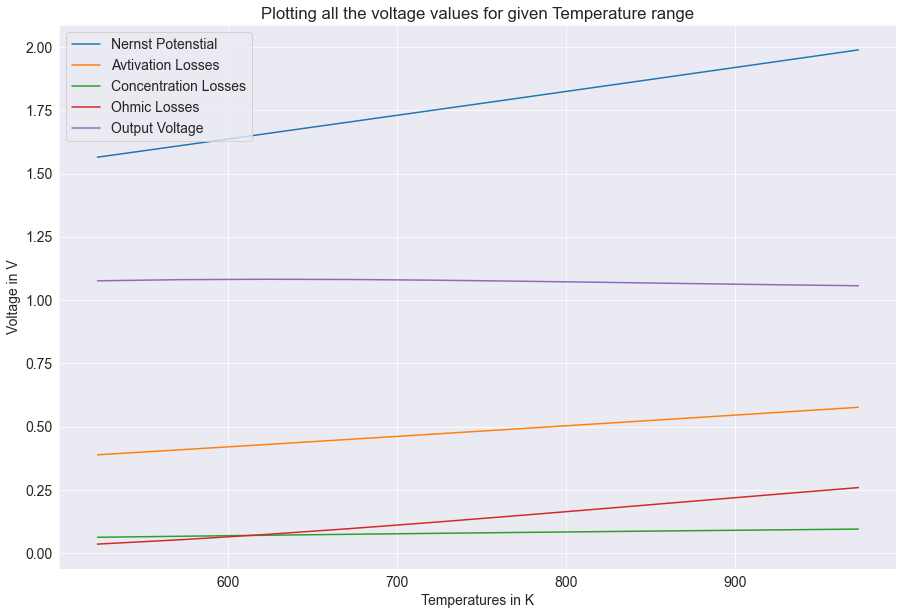

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Current v/s Voltage plot


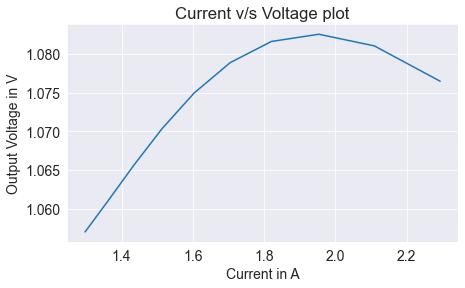

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Output Result
   Temperature (K)  Nernst Voltage(V)  Activation Losses(V)  \
0              523           1.564879              0.388975   
1              573           1.611395              0.409267   
2              623           1.658077              0.429802   
3              673           1.704916              0.450514   
4              723           1.751901              0.471356   
5              773           1.799024              0.492297   
6              823           1.846277              0.513317   
7              873           1.893654              0.534399   
8              923           1.941148              0.555532   
9              973           1.988753              0.576708   

   Concentration Losses(V)  Ohmic Losses(V)  Current Density  \
0                 0.063159         0.036258         2.293930

In [7]:
main_function([25,50,75], [25,50,75], [523, 573, 623, 673, 723, 773, 823, 873, 923, 973])